# Machine Learning Lab 1
Decision Trees on UCI data

**Name:** Fatima Mujahid

**Class:** BESE-10B

**CMS ID:** 289558

**Date:** February 17, 2021

# Monks Problems Dataset

58 % 21 = 16

Dataset is 16_monks-problems-3.csv

# Importing modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Reading csv file

In [ ]:
data = pd.read_csv("16_monks-problems-3.csv", sep=";")
data.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,label
0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1
1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1
2,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1
3,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1


# Partitioning the dataset

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Applying DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Printing the accuracy for train and test

In [ ]:
print("Training Accuracy is ", accuracy_score(y_train, y_pred_train)*100, "%")
print("Testing Accuracy is ", accuracy_score(y_test, y_pred_test)*100, "%")

Training Accuracy is  100.0 %
Testing Accuracy is  100.0 %


# Varying the depth of decision tree

In [ ]:
train_errors = list()
test_errors = list()
for x in range(1, 18):
  clf = DecisionTreeClassifier(criterion="entropy", max_depth=x)
  clf.fit(X_train, y_train)
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  train_error = 1 - accuracy_score(y_train, y_pred_train) 
  test_error = 1 - accuracy_score(y_test, y_pred_test)
  train_errors.append(train_error)
  test_errors.append(test_error)

# Generating plot

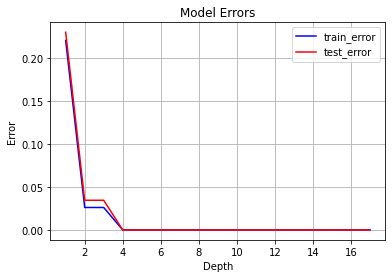

In [ ]:
depths = range(1, 18)
plt.figure()
plt.plot(depths, train_errors, 'b')
plt.plot(depths, test_errors, 'r')
plt.title('Model Errors')
plt.ylabel('Error')
plt.xlabel('Depth')
plt.legend(['train_error','test_error'])
plt.grid()
plt.show()

# Best depth to avoid overfitting

From the graph above it is clear that the maximum depth to avoid overfitting should be 2. As after 2 the train and test errors are remaining almost 0 and the model is likely to overfit.



# Visualizing the decision tree

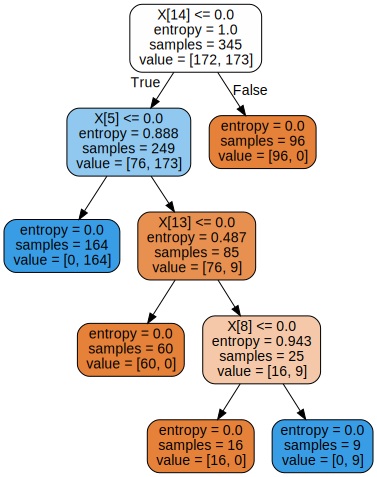

In [ ]:
graph_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True)  
graph = graphviz.Source(graph_data)  
graph 